(512, 512)


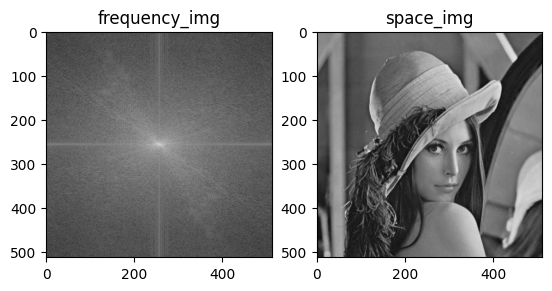

In [12]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
#读取图像
img = cv2.imread(r"../assest/lean.jpg", 0)  # 直接读为灰度图像
# numpy傅里叶变换
frequency = np.fft.fft2(img)
# 移位
frequency_shift = np.fft.fftshift(frequency)
# 取绝对值：将复数变化成实数
# 取对数的目的为了将数据变化到较小的范围（比方0-255）
frequency_img = np.log(np.abs(frequency_shift))

# 进行傅里叶逆变换 将频率谱转为图像
img_back = np.abs(np.fft.ifft2(frequency))

# 移位到中点的频率图
plt.subplot(121), plt.imshow(frequency_img, 'gray'), plt.title('frequency_img')
#展示图像
plt.subplot(122), plt.imshow(img_back, 'gray'), plt.title('space_img')
plt.show()

进行以幅频为1的重建

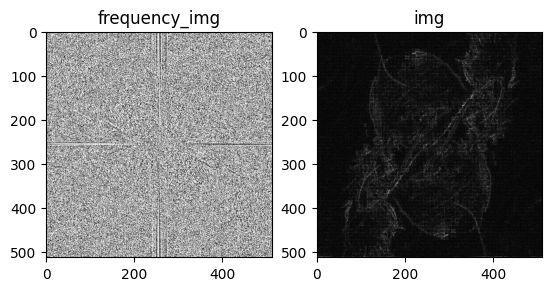

In [52]:
method_1_frequency=frequency
method_1_frequency_shift=np.fft.fftshift(method_1_frequency)
for x in range(method_1_frequency_shift.shape[0]):
    for y in range(method_1_frequency_shift.shape[1]):
        real=method_1_frequency_shift[x][y].real
        imag=method_1_frequency_shift[x][y].imag
        angle = math.atan2(real,imag)
        method_1_frequency_shift[x][y]=complex(math.cos(angle) +math.sin(angle))
method_1_frequency_img=np.abs(method_1_frequency_shift)
method_1_img_back = np.abs(np.fft.ifft2(method_1_frequency_shift))
plt.subplot(121), plt.imshow(method_1_frequency_img, 'gray'), plt.title('frequency_img')
plt.subplot(122), plt.imshow(method_1_img_back, 'gray'), plt.title('img')
plt.show()

        

幅频不变，相频为0

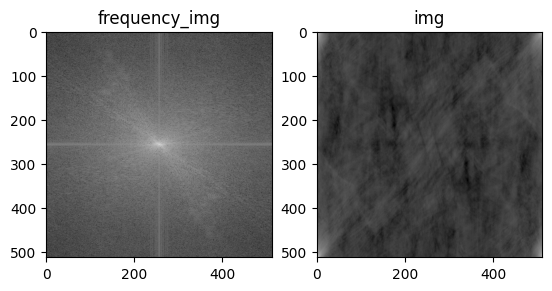

In [62]:
method_2_frequency=frequency
method_2_frequency_shift=np.fft.fftshift(method_2_frequency)
for x in range(method_2_frequency_shift.shape[0]):
    for y in range(method_2_frequency_shift.shape[1]):
        real=method_2_frequency_shift[x][y].real
        imag=method_2_frequency_shift[x][y].imag
        value=math.sqrt(real*real+imag*imag)
        method_2_frequency_shift[x][y]=complex(value+0)
method_2_frequency_img=np.log(np.abs(method_2_frequency_shift))
method_2_img_back = np.log(np.abs(np.fft.ifft2(method_2_frequency_shift)))
plt.subplot(121), plt.imshow(method_2_frequency_img, 'gray'), plt.title('frequency_img')
plt.subplot(122), plt.imshow(method_2_img_back, 'gray'), plt.title('img')
plt.show()